In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## Data Preparation

In [5]:
X,Y = load_digits(return_X_y=True)

In [7]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

1437
(1437, 64) (1437,)
(360, 64) (360,)


## Visualize the data

In [12]:
def drawImg(sample,label):
    im = sample.reshape((8,8))
    plt.axis('off') 
    plt.title("Label: " + str(label))
    plt.imshow(im)
    plt.show()

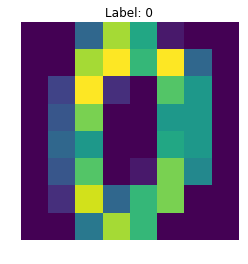

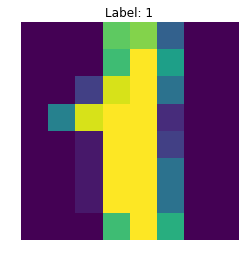

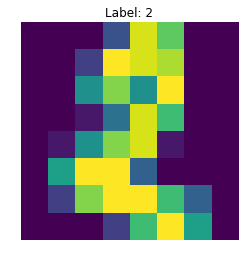

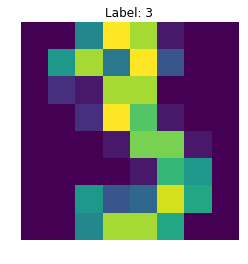

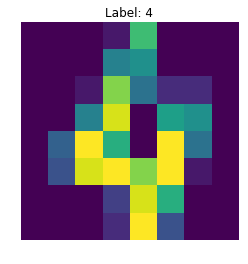

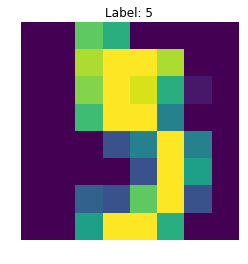

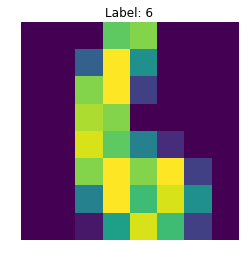

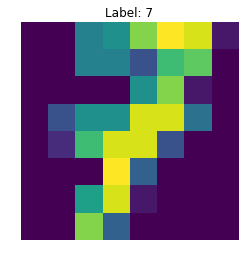

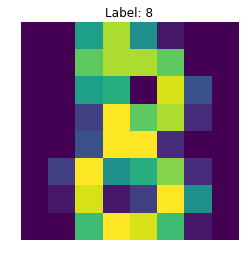

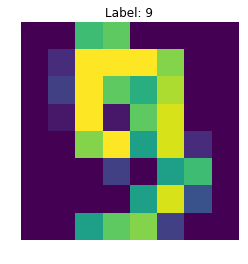

In [13]:
for i in range(10):
    drawImg(X[i],Y[i])

## KNN Classifier

In [ ]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    
    # Nearest/first k points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

## Predictions

In [19]:
def predict(X_train,Y_train,X_test,k=5):
    Ypred = []
    for sample in X_test:
        Ypred.append(knn(X_train,Y_train,sample,k))
    return Ypred

In [32]:
pred = predict(X_train,Y_train,[X_test[0]])

In [33]:
print(pred)

[2.0]


## Accuracy

In [30]:
def accuracy(X_train,Y_train,X_test,Y_test):
    cnt = 0
    Ypred = predict(X_train,Y_train,X_test)
    for i in range(len(X_test)):
        cnt += (Ypred[i] == Y_test[i])
        
    return cnt/X_test.shape[0]

In [34]:
print(accuracy(X_train,Y_train,X_test,Y_test))

0.963888888889
